# Predicted IMF and pH of lamb loin samples.


In this notebook the Intra-Muscular Fat (IMF) percentage and pH are presented for each lamb loin sample. The IMF and pH are predicted using the NIR spectrum of each sample based on 2014,'15,'16 lamb data.   


In [1]:
## This cell sets up the interactive plots for the notebook

import numpy as np
import matplotlib.pylab as plt


## update the annotation to with the Tag ID, pH and IMF.
def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos

    print(pos)
    text = " ID:   {}\n pH:  {} \n IMF: {}".format("  ".join([str(names[n]) for n in ind["ind"]])," ".join(list(map(str,IMF[ind["ind"]])))," ".join(list(map(str,pH[ind["ind"]]))), )
    annot.set_text(text)
    annot.get_bbox_patch().xy = (40,4)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.5)

    
## update the annotation when hovering the cursor over the data point.
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
                

<IPython.core.display.Javascript object>


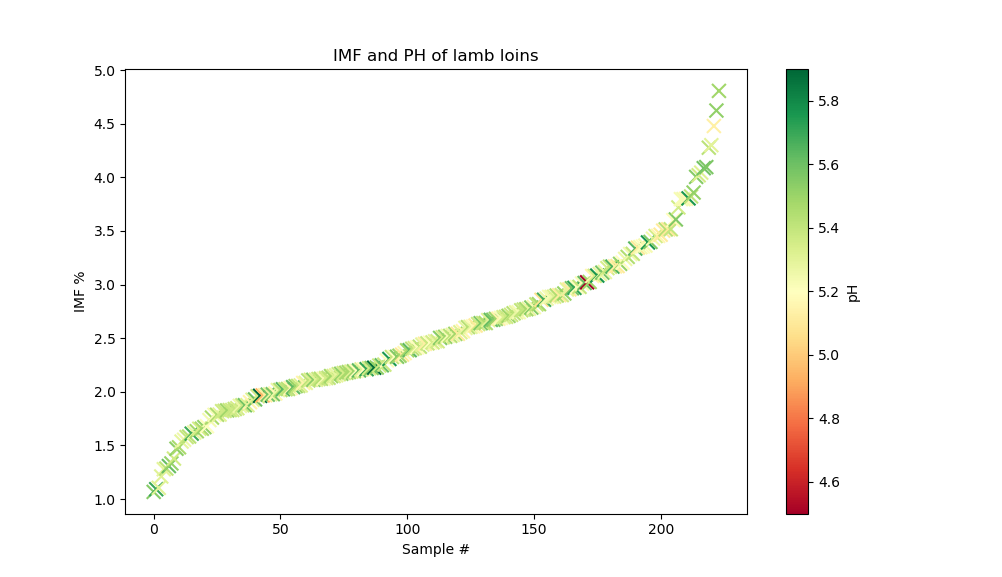

In [5]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'


### Load the data 
data = np.genfromtxt('BLG2018NIRb_180321Invermay.csv', dtype=None, delimiter=',', names=True)
data.sort(order = 'IMF')

ID = data['ID']
IMF = np.around(data['IMF'],4)
pH = np.around(data['pH'],4)
names = ID
cmap = plt.cm.RdYlGn
c = pH
norm = plt.Normalize(4.5,5.9)

x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('IMF and PH of lamb loins')
plt.ylabel('IMF %')
plt.xlabel('Sample #')
sc = plt.scatter(x,IMF,c=c, s=100, cmap=cmap, norm=norm, marker = 'x')
cbar = plt.colorbar(sc)
cbar.set_label('pH')
annot = ax.annotate("", xy=(0,0), xytext=(0,4),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()


<IPython.core.display.Javascript object>


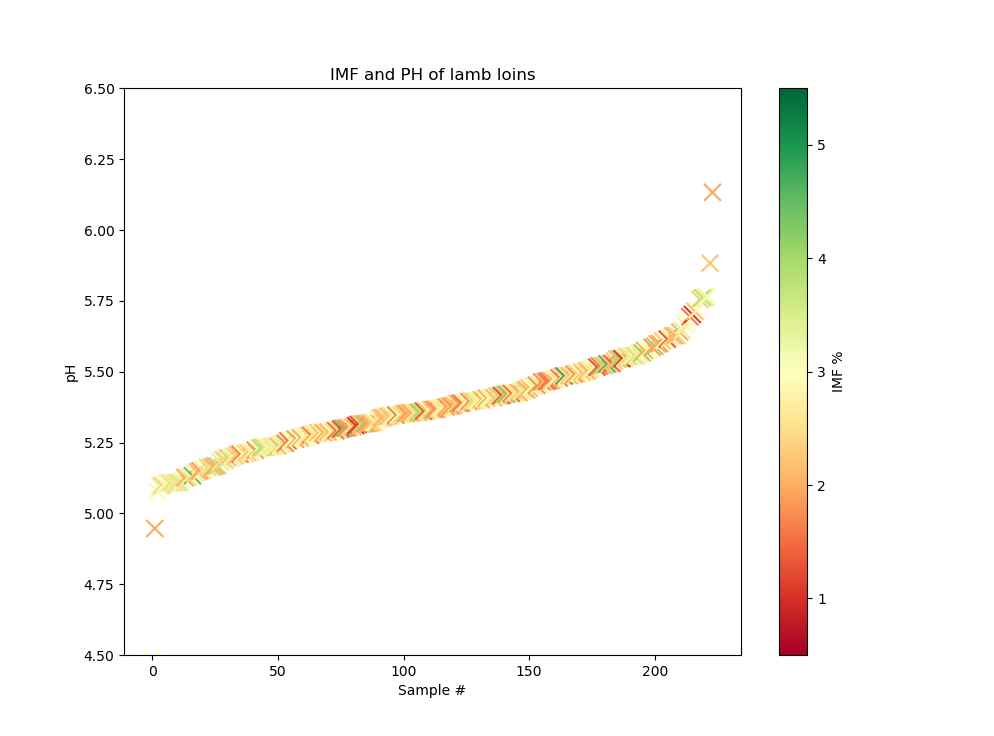

In [3]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

data.sort(order = 'pH')

ID = data['ID']
IMF = np.around(data['IMF'],3)
pH = np.around(data['pH'],3)
names = ID
cmap = plt.cm.RdYlGn
c = IMF
norm = plt.Normalize(0.5,5.5)
x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('IMF and PH of lamb loins')
plt.ylabel('pH')
plt.xlabel('Sample #')
sc = plt.scatter(x,pH,c=c, s=100, cmap=cmap, norm=norm, marker = 'x')
plt.ylim(4.5,6.5)
cbar = plt.colorbar(sc)
cbar.set_label('IMF %')
annot = ax.annotate("", xy=(0,0), xytext=(0,5.75),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"),horizontalalignment='left')
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()